# Tools for working with Arcadia's colors

Arcadia has a set of brand colors which are used in the website, presentations, and other materials. Consistent use of these colors can help scientists make their data visually appealing, and is important for maintaining a consistent brand identity. `arcadia-pycolor` provides access to these colors for use when making plots and figures in Python.

## Getting Started

After installing `arcadia-pycolor` using `pip install arcadia-pycolor`, you can import the `arcadia_pycolor` module.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import arcadia_pycolor as apc

## Accessing and displaying colors

`arcadia-pycolor` stores the brand colors as objects based on their color name. When working with Jupyter notebooks, you can display the colors as part of a cell's output. This displays a swatch of the color, along with the color's name and hex code.

In [2]:
apc.aegean

   aegean #5088C5

You can also use the IPython function `display` to show the colors in a cell's output, even if the cell ends with other code.

In [3]:
display(apc.amber)

# Some other code.
x = 1
y = 2
print(x + y)

   amber #F28360

3


## `Palette`s and `Gradient`s

`arcadia-pycolor` provides two classes for working with multiple colors: `Palette` and `Gradient`. `Palette` is a collection of discrete colors, while `Gradient` is a collection of colors that transition smoothly from one to the next. The package contains a variety of built-in palettes and gradients, which can be accessed under the `palettes` and `gradients` namespaces. These can also be displayed in the same way as individual colors.

In [4]:
# Displaying a Palette.
apc.palettes.primary

                        
   aegean    #5088C5
   amber     #F28360
   seaweed   #3B9886
   canary    #F7B846
   aster     #7A77AB
   rose      #F898AE
   vital     #73B5E3
   tangerine #FFB984
   lime      #97CD78
   dragon    #C85152
   oat       #F5E4BE
   wish      #BABEE0

In [5]:
# Displaying a Gradient.
apc.gradients.viridis

                     
   space  #282A49 0
   aegean #5088C5 0.468
   lime   #97CD78 0.746
   butter #FFFDBD 1

## Using colors in plots

Colors can be used in plots by passing them as arguments to plotting functions. For example, in `matplotlib`, you can pass a color object or a list of color objects as the `color` argument to `plot`, `scatter`, or other plotting functions.

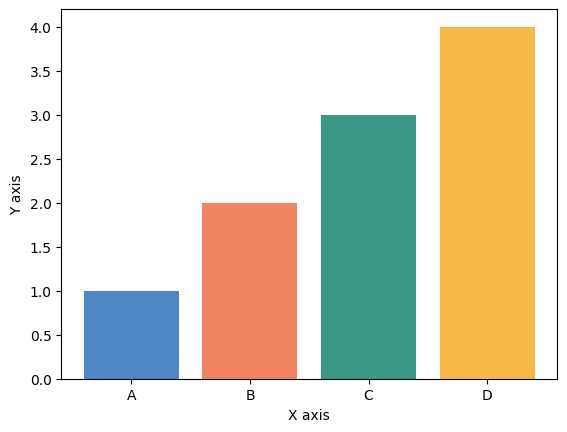

In [6]:
# Using Arcadia colors in a matplotlib plot.
plt.bar(
    x=["A", "B", "C", "D"],
    height=[1, 2, 3, 4],
    color=[apc.aegean, apc.amber, apc.seaweed, apc.canary],
)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

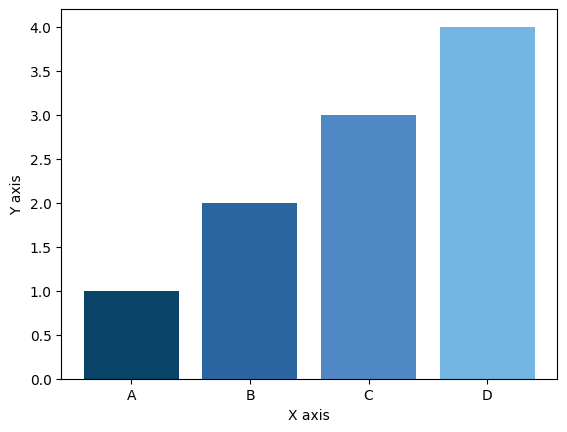

In [7]:
# Getting colors from a palette for a plot.
plt.bar(
    x=["A", "B", "C", "D"],
    height=[1, 2, 3, 4],
    color=apc.palettes.blue_shades.colors[0:4],
)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

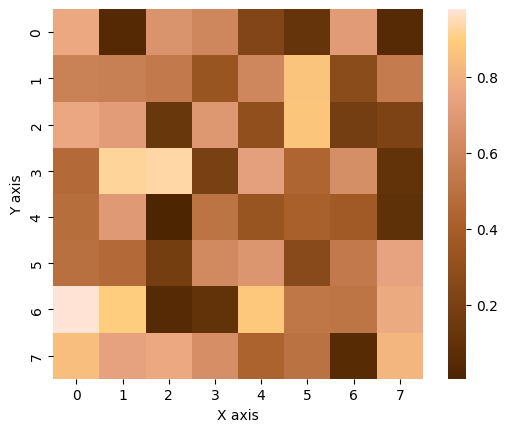

In [8]:
# Using a gradient with `seaborn`.
data = np.random.rand(8, 8)
sns.heatmap(data, cmap=apc.gradients.sunset.to_mpl_cmap(), square=True)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

## Creating custom palettes and gradients

You can create custom palettes by passing a list of colors to the `Palette` constructor, or using the `Palette.from_dict` method.

In [9]:
# Creating a Palette from a list of colors.
my_palette = apc.Palette("my_palette", [apc.aegean, apc.amber, apc.seaweed, apc.canary])

my_palette

        
   aegean  #5088C5
   amber   #F28360
   seaweed #3B9886
   canary  #F7B846

In [10]:
# Creating a Palette from a dictionary.
my_palette = apc.Palette.from_dict(
    "my_palette",
    {
        "red": "#FF0000",
        "green": "#00FF00",
        "blue": "#0000FF",
    },
)

my_palette

      
   red   #FF0000
   green #00FF00
   blue  #0000FF

Similarly, you can create custom gradients by passing a list of colors to the `Gradient` constructor, or using the `Gradient.from_dict` method. For `Gradient`s, you may also specify the position of each color in the gradient. If you do not specify this value, the colors will be evenly spaced.

> **Note:** Values for the color position must be between 0 and 1, and must be in increasing order.

In [11]:
# Creating a Gradient from a list of colors.
my_gradient = apc.Gradient("my_gradient", [apc.vital, apc.oat, apc.amber])

my_gradient

                     
   vital #73B5E3 0.0
   oat   #F5E4BE 0.5
   amber #F28360 1.0

In [12]:
# Creating a Gradient from a list of colors while specifying values.
my_gradient = apc.Gradient(
    "my_gradient",
    [apc.concord, apc.vital, apc.oat, apc.amber, apc.cinnabar],
    [0, 0.35, 0.5, 0.65, 1],
)

my_gradient

                     
   concord  #341E60 0
   vital    #73B5E3 0.35
   oat      #F5E4BE 0.5
   amber    #F28360 0.65
   cinnabar #9E3F41 1

In [13]:
# Creating a Gradient from a dictionary of colors.
my_gradient = apc.Gradient.from_dict(
    "my_gradient",
    {
        "red": "#FF0000",
        "gray": "#DDDDDD",
        "blue": "#0000FF",
    },
)

my_gradient

                     
   red  #FF0000 0.0
   gray #DDDDDD 0.5
   blue #0000FF 1.0

## `Palette` utilities

`Palette` objects have several utility methods for working with colors.

In [14]:
# Reverse the order of a Palette.
display(apc.palettes.primary)
display(apc.palettes.primary.reverse())

                        
   aegean    #5088C5
   amber     #F28360
   seaweed   #3B9886
   canary    #F7B846
   aster     #7A77AB
   rose      #F898AE
   vital     #73B5E3
   tangerine #FFB984
   lime      #97CD78
   dragon    #C85152
   oat       #F5E4BE
   wish      #BABEE0

                        
   wish      #BABEE0
   oat       #F5E4BE
   dragon    #C85152
   lime      #97CD78
   tangerine #FFB984
   vital     #73B5E3
   rose      #F898AE
   aster     #7A77AB
   canary    #F7B846
   seaweed   #3B9886
   amber     #F28360
   aegean    #5088C5

In [15]:
# "Adding two palettes together concatenates
# their colors and returns a single new palette
# (just like adding two lists concatenates
# them and returns a new list)."
apc.palettes.primary + apc.palettes.secondary

                                        
   aegean    #5088C5
   amber     #F28360
   seaweed   #3B9886
   canary    #F7B846
   aster     #7A77AB
   rose      #F898AE
   vital     #73B5E3
   tangerine #FFB984
   lime      #97CD78
   dragon    #C85152
   oat       #F5E4BE
   wish      #BABEE0
   sky       #C6E7F4
   dress     #F8C5C1
   taupe     #DBD1C3
   denim     #B6C8D4
   sage      #B5BEA4
   marine    #8A99AD
   mars      #DA9085
   shell     #EDE0D6

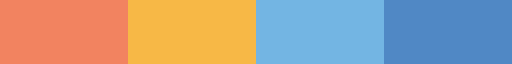

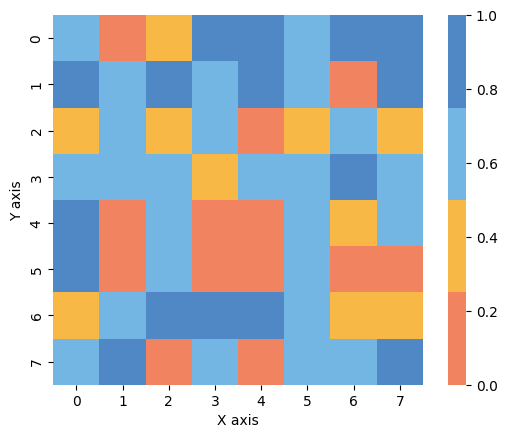

In [16]:
# Convert a Palette into a `matplotlib.colors.ListedColormap`.
evaluation_palette = apc.Palette(
    "evaluation_palette",
    [apc.amber, apc.canary, apc.vital, apc.aegean],
)

display(evaluation_palette.to_mpl_cmap())

# You might use this in situations where you want to translate a
# continuous variable into a categorical variable, such as when
# showing quartiles in a heatmap.
data = np.random.rand(8, 8)
sns.heatmap(data, cmap=evaluation_palette.to_mpl_cmap(), vmin=0, vmax=1, square=True)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.show()

## `Gradient` utilities

`Gradient` objects have a variety of utilities for working with gradients.

In [17]:
# Reverse the direction of a gradient
display(apc.gradients.viridis)
display(apc.gradients.viridis.reverse())

                     
   space  #282A49 0
   aegean #5088C5 0.468
   lime   #97CD78 0.746
   butter #FFFDBD 1

                     
   butter #FFFDBD 0
   lime   #97CD78 0.254
   aegean #5088C5 0.532
   space  #282A49 1

In [18]:
# Add gradients together.
apc.gradients.reds + apc.gradients.blues.reverse()

                     
   cinnabar #9E3F41 0.0
   dragon   #C85152 0.106
   blush    #FFF3F4 0.5
   zephyr   #F4FBFF 0.5
   aegean   #5088C5 0.873
   lapis    #2B65A1 1.0

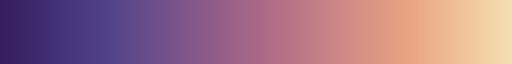

In [19]:
# Convert a Palette into a `matplotlib.colors.LinearSegmentedColormap`.
apc.gradients.magma.to_mpl_cmap()

In [20]:
# Convert a Gradient into a Palette with a specified number of colors.
apc.gradients.magma.resample_as_palette(7)

              
   magma_0 #341e60
   magma_1 #4c3b81
   magma_2 #77528b
   magma_3 #aa6889
   magma_4 #cd8985
   magma_5 #ebaf8b
   magma_6 #f5dfb2

## Checking gradient lightness

For most applications, gradients should transition smoothly from light to dark (or vice versa), without major inflection points in intensity. You can check the lightness of a gradient using the `apc.plot.plot_gradient_lightness` function.

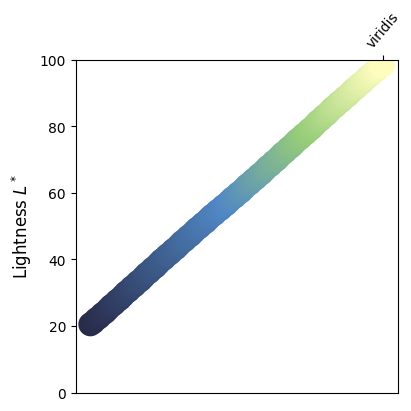

In [21]:
apc.plot.plot_gradient_lightness(apc.gradients.viridis)

When building custom gradients, you can use the `.interpolate_lightness()` method of any `Gradient` object to ensure that the gradient transitions smoothly from light to dark.

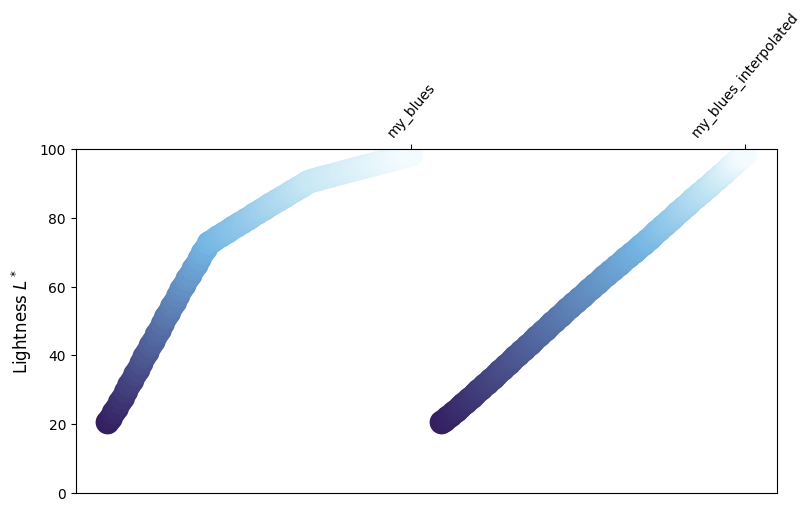

                     
   concord #341E60 0.0
   vital   #73B5E3 0.3333333333333333
   sky     #C6E7F4 0.6666666666666666
   zephyr  #F4FBFF 1.0

                     
   concord #341E60 0.0
   vital   #73B5E3 0.67
   sky     #C6E7F4 0.901
   zephyr  #F4FBFF 1.0

In [22]:
# The colors in this custom gradient aren't smoothly increasing in lightness.
my_blues = apc.Gradient(
    "my_blues",
    [apc.concord, apc.vital, apc.sky, apc.zephyr],
)

# This method adjusts the positions of colors so that lightness is smoothly increasing.
my_blues_interpolated = my_blues.interpolate_lightness()

# You can see the difference in lightness by plotting the gradients.
apc.plot.plot_gradient_lightness([my_blues, my_blues_interpolated], figsize=(8, 5))

display(my_blues)
display(my_blues_interpolated)

## Displaying all available colors, gradients, and palettes

In [23]:
# Display all colors.
apc.palettes.all_colors

                                                                                                                                                                      
   aegean     #5088C5
   amber      #F28360
   seaweed    #3B9886
   canary     #F7B846
   aster      #7A77AB
   rose       #F898AE
   vital      #73B5E3
   tangerine  #FFB984
   lime       #97CD78
   dragon     #C85152
   oat        #F5E4BE
   wish       #BABEE0
   sky        #C6E7F4
   dress      #F8C5C1
   taupe      #DBD1C3
   denim      #B6C8D4
   sage       #B5BEA4
   marine     #8A99AD
   mars       #DA9085
   shell      #EDE0D6
   gray       #EBEDE8
   chateau    #BAB0A8
   bark       #8F8885
   slate      #43413F
   charcoal   #484B50
   crow       #292928
   forest     #596F74
   pitch      #09090A
   parchment  #FDF8F2
   zephyr     #F4FBFF
   lichen     #F7FBEF
   dawn       #F8F4F1
   concord    #341E60
   brightgray #EAEAEA
   paper      #FCFCFC
   redwood    #52180A
   depths     #09473E
   soil       #4D25

In [24]:
# Display all palettes.
apc.plot.display_all_palettes()

Primary
                        
Secondary
                
Neutral
                
Background
        
PrimaryOrdered
                        
SecondaryOrdered
                
AllOrdered
                                        
BlueShades
          
RedShades
          
YellowShades
          
PurpleShades
          
TealShades
          
PinkShades
          
WarmGrayShades
          
CoolGrayShades
          
GreenShades
          
Other
                                      
Named
                
AllColors
                                                                                                                                                                      
BlueShades+RedShades+YellowShades+PurpleShades+TealShades+PinkShades+WarmGrayShades+CoolGrayShades+GreenShades
                                                                                          


In [25]:
# Display all gradients.
apc.plot.display_all_gradients()

magma
                     
viridis
                     
verde
                     
sunset
                     
wine
                     
lisafrank
                     
reds
                     
oranges
                     
greens
                     
sages
                     
blues
                     
purples
                     
orange_sage
                     
red_blue
                     
purple_green
                     
